# Module 3: Final technical exercise

### 🧹PHASE 1: Exploration and Cleaning🧹

In [1]:
import pandas as pd
import numpy as np
import random
import emoji

In [2]:
df_flights = pd.read_csv("Customer Flight Activity.csv")
df_loyalty = pd.read_csv("Customer Loyalty History.csv")

In [3]:
df_loyalty.tail()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
16736,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0


In [4]:
df_flights.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [5]:
df_airline = df_loyalty.merge(df_flights, on="Loyalty Number", how="outer") 

In [6]:
df_airline.sample()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,...,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
22940,151571,Canada,Newfoundland,St. John's,A1C 6H9,Female,Bachelor,86016.0,Married,Aurora,...,NaN,2018,2,7,0,7,966,144.0,375,30


In [7]:
df_airline.shape

(405624, 25)

In [8]:
df_airline.info()
#There are some types of data that need to be changed, such as in the Cancellation Year and Cancellation Month columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Country                      405624 non-null  object 
 2   Province                     405624 non-null  object 
 3   City                         405624 non-null  object 
 4   Postal Code                  405624 non-null  object 
 5   Gender                       405624 non-null  object 
 6   Education                    405624 non-null  object 
 7   Salary                       302952 non-null  float64
 8   Marital Status               405624 non-null  object 
 9   Loyalty Card                 405624 non-null  object 
 10  CLV                          405624 non-null  float64
 11  Enrollment Type              405624 non-null  object 
 12  Enrollment Year              405624 non-null  int64  
 13 

In [9]:
# Checking randomly that there is no data written incorrectly or that it contains errors
df_airline['Education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [10]:
df_airline['Marital Status'].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

**Duplicates handling**

In [11]:
df_airline["Loyalty Number"].value_counts()

Loyalty Number
678205    72
467894    48
684881    48
208241    48
126490    48
          ..
403361    24
403463    24
403473    24
403500    24
999986    24
Name: count, Length: 16737, dtype: int64

In [12]:
df_airline[df_airline['Loyalty Number'] == 678205]

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,...,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
260688,678205,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,...,NaN,2017,1,0,0,0,0,0.0,0,0
260689,678205,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,...,NaN,2017,1,0,0,0,0,0.0,0,0
260690,678205,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,...,NaN,2017,1,0,0,0,0,0.0,0,0
260691,678205,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,...,NaN,2017,2,0,0,0,0,0.0,0,0
260692,678205,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,...,NaN,2017,2,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260755,678205,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,...,NaN,2018,11,11,0,11,1177,117.0,0,0
260756,678205,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,...,NaN,2018,11,8,1,9,1341,134.0,0,0
260757,678205,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,...,NaN,2018,12,0,0,0,0,0.0,0,0
260758,678205,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,...,NaN,2018,12,0,0,0,0,0.0,0,0


In [13]:
df_airline = df_airline.drop_duplicates() #Removing duplicates

In [14]:
df_airline.duplicated().sum()

0

**Vamos a tratar los nulos**

In [15]:
#Analysis of which columns contain missing data

df_airline.isnull().sum()

Loyalty Number                      0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102260
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              354110
Cancellation Month             354110
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
dtype: int64

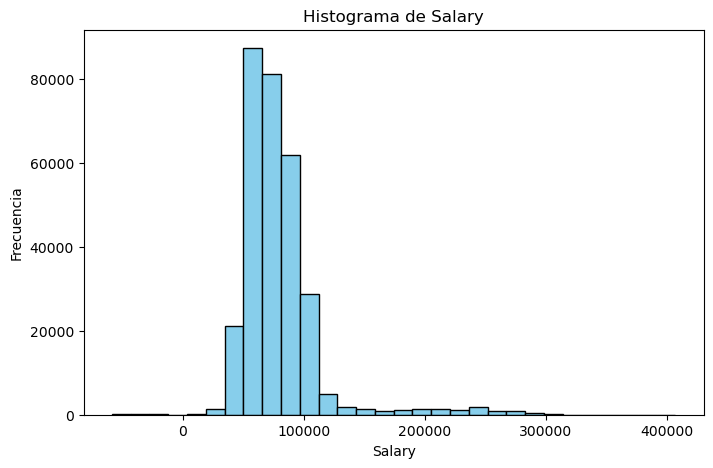

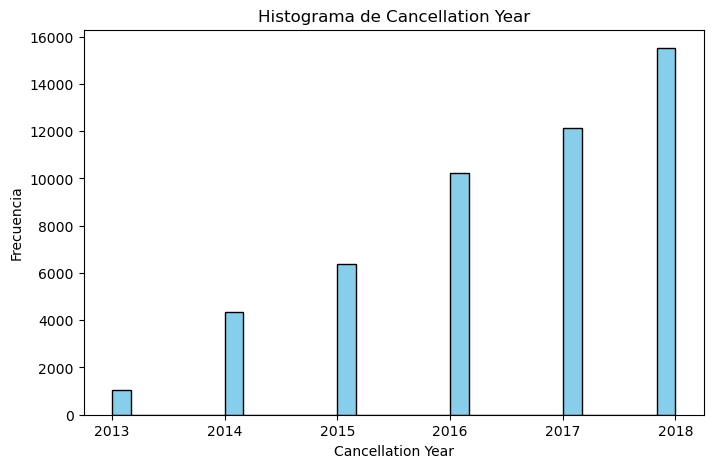

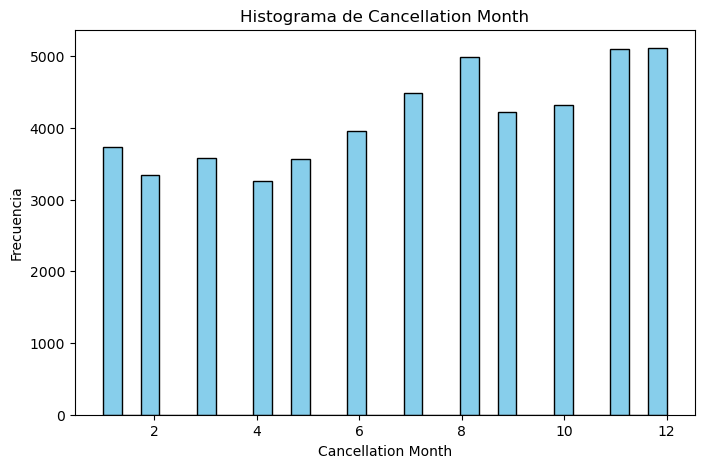

In [16]:
import matplotlib.pyplot as plt
#I want to see the distribution of the nulls, to see if they have a normal distribution:
null_numeric_columns = df_airline[df_airline.columns[df_airline.isnull().any()]].select_dtypes(include = "number").columns

for col in list(null_numeric_columns): # if it detects a null, it makes a histogram
    plt.figure(figsize=(8, 5))
    plt.hist(df_airline[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

In [17]:
#Let's see the % of null values ​​in the columns
for col in null_numeric_columns:
    print(f"The distribution of categories (including null values ​​🏴󠁴󠁨󠀵󠀵󠁿) for the column", col)
    display(df_airline[col].value_counts(dropna=False, normalize=True) * 100) 
    print("........................")

The distribution of categories (including null values ​​🏴󠁴󠁨󠀵󠀵󠁿) for the column Salary


Salary
 NaN         25.326927
 101933.0     0.136715
 62283.0      0.083218
 51573.0      0.083218
 61809.0      0.083218
               ...    
-31911.0      0.005944
 64630.0      0.005944
 77950.0      0.005944
 85525.0      0.005944
 46594.0      0.005944
Name: proportion, Length: 5891, dtype: float64

........................
The distribution of categories (including null values ​​🏴󠁴󠁨󠀵󠀵󠁿) for the column Cancellation Year


Cancellation Year
NaN       87.703091
2018.0     3.843620
2017.0     3.008470
2016.0     2.538141
2015.0     1.575193
2014.0     1.075887
2013.0     0.255597
Name: proportion, dtype: float64

........................
The distribution of categories (including null values ​​🏴󠁴󠁨󠀵󠀵󠁿) for the column Cancellation Month


Cancellation Month
NaN     87.703091
12.0     1.266099
11.0     1.261888
8.0      1.236378
7.0      1.109570
10.0     1.070438
9.0      1.046166
6.0      0.980781
1.0      0.923073
3.0      0.886418
5.0      0.881464
2.0      0.826233
4.0      0.808401
Name: proportion, dtype: float64

........................


    ✍🏼Conclusion: In the 3 columns we have a high percentage of nulls (more than 15% in each column)

We have asked the airline about the importance of these 3 columns and they tell us that:

💰 **Salary:** This is an essential piece of information, we will need to use more advanced techniques to deal with nulls.

📅 **Year and month of cancellation:** These customers are still active, we will complete with "Current" and "Ongoing"

In [18]:
df_airline['Cancellation Month'] = df_airline['Cancellation Month'].fillna('Ongoing')

In [19]:
df_airline['Cancellation Year'] = df_airline['Cancellation Year'].fillna('Current')

In [20]:
#I want to see where we have more nulls

salary_education = df_airline.groupby("Education")["Salary"].mean().reset_index()
salary_education.rename(columns={"Salary": "Average Salary"}, inplace=True)
print(salary_education)

              Education  Average Salary
0              Bachelor    72473.471154
1               College             NaN
2                Doctor   178403.675202
3  High School or Below    61019.926143
4                Master   103734.523724


In [21]:
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer 
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

In [22]:
# Using imputer techniques to try to obtain the data we are missing because we are going to need this column

imputer_iter = IterativeImputer(max_iter = 100, random_state = 42)
df_airline['Salary'] = imputer_iter.fit_transform(df_airline[['Salary']])

In [23]:
df_airline.isnull().sum()

Loyalty Number                 0
Country                        0
Province                       0
City                           0
Postal Code                    0
Gender                         0
Education                      0
Salary                         0
Marital Status                 0
Loyalty Card                   0
CLV                            0
Enrollment Type                0
Enrollment Year                0
Enrollment Month               0
Cancellation Year              0
Cancellation Month             0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [24]:
# Changed the data type now that we have no nulls or duplicates

df_airline['Enrollment Year']=df_airline['Enrollment Year'].astype(int)
df_airline['Enrollment Month']=df_airline['Enrollment Month'].astype(int)

In [25]:
# Changing the following columns to category type: gender, marital status, and education

categorical_cols = ["Gender", "Marital Status", "Education"]
df_airline[categorical_cols] = df_airline[categorical_cols].astype("category")

In [26]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403760 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   Loyalty Number               403760 non-null  int64   
 1   Country                      403760 non-null  object  
 2   Province                     403760 non-null  object  
 3   City                         403760 non-null  object  
 4   Postal Code                  403760 non-null  object  
 5   Gender                       403760 non-null  category
 6   Education                    403760 non-null  category
 7   Salary                       403760 non-null  float64 
 8   Marital Status               403760 non-null  category
 9   Loyalty Card                 403760 non-null  object  
 10  CLV                          403760 non-null  float64 
 11  Enrollment Type              403760 non-null  object  
 12  Enrollment Year              403760 non-null  int

In [27]:
# We already have the duplicates and nulls cleaned 🧼 and also the data type according to our interests 🎉

In [ ]:
df_airline.to_csv("df_airline.csv", index=False) # To download DataFrame in CSV

### 📊 PHASE 2: Visualization📊

In [29]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) # to be able to display all the columns of the DataFrames

**1. How is the number of flights booked per month distributed during each year?**

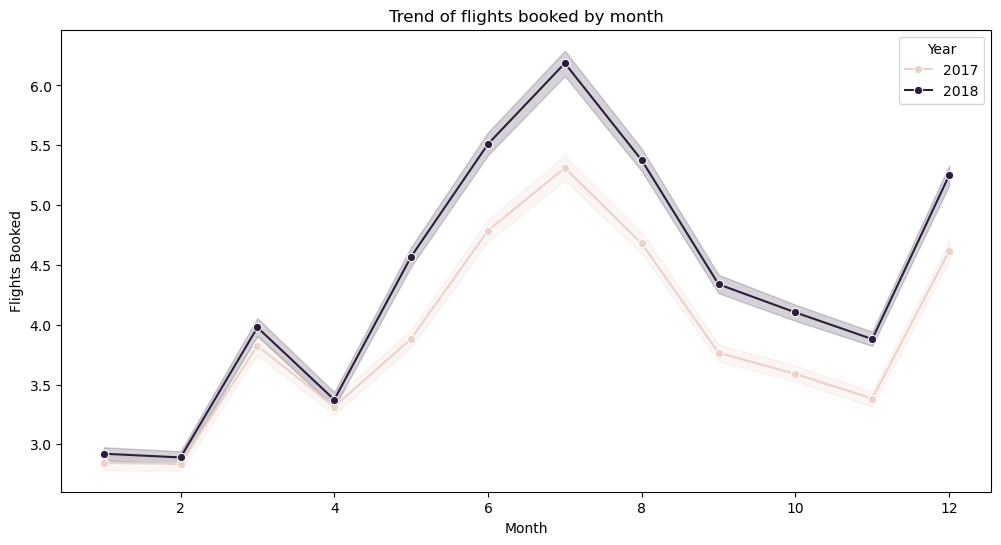

In [30]:
# For the analysis of numerical Bivariate analysis, it would be best to use a heatmap, line or scatter plot diagram.

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_airline, x="Month", y="Flights Booked", hue="Year", marker="o")
plt.title("Trend of flights booked by month")
plt.xlabel("Month")
plt.ylabel("Flights Booked")
plt.legend(title="Year")
plt.show()


✍🏼 They have a very similar distribution during the first quarter of the year and an increase in activity is observed in both years during the second and third quarter, spring-summer months. During the last quarter of the year, both experience a progressive drop in activity, followed by an exponential peak towards the end of the year, most likely caused by the Christmas holidays. It is worth noting that greater activity is observed in 2018 compared to 2017.

**2. Is there a relationship between flight distance and points accumulated by customers?**

Text(0.5, 1.0, 'Relationship between flight distance and points accumulated per customer')

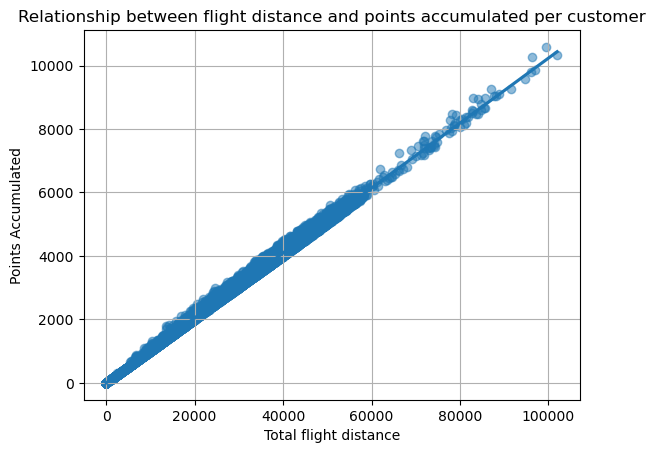

In [31]:
customer_data = df_airline.groupby("Loyalty Number")[["Distance", "Points Accumulated"]].sum().reset_index()

sns.regplot(x="Distance", y="Points Accumulated", data=customer_data, scatter_kws={"alpha":0.5})
plt.xlabel("Total flight distance")
plt.ylabel("Points Accumulated")
plt.grid(True)
plt.title("Relationship between flight distance and points accumulated per customer")


Text(0.5, 1.0, 'Relationship between flight distance and points accumulated per customer')

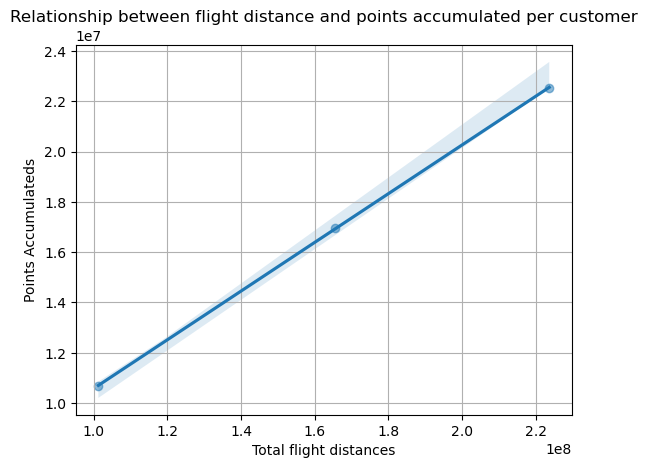

In [ ]:
customer_distance_data = df_airline.groupby("Loyalty Card")[["Distance", "Points Accumulated"]].sum().reset_index()

sns.regplot(x="Distance", y="Points Accumulated", data=customer_distance_data, scatter_kws={"alpha":0.5})
plt.xlabel("Total flight distances")
plt.ylabel("Points Accumulateds")
plt.grid(True)
plt.title("Relationship between flight distance and points accumulated per customer")

✍🏼 There is a clear relationship between the distance traveled on flights and the number of points accumulated.
This relationship seems to be positive, since when one of the two variables increases, the other does as well.

**3. What is the distribution of customers by province or state? We want to see how many customers there are in each
province.**

In [33]:
province_unique = df_airline.groupby('Province')['Loyalty Number'].nunique().sort_values(ascending=False).reset_index()
province_unique

,Province,Loyalty Number
0,Ontario,5404
1,British Columbia,4409
2,Quebec,3300
3,Alberta,969
4,Manitoba,658
5,New Brunswick,636
6,Nova Scotia,518
7,Saskatchewan,409
8,Newfoundland,258
9,Yukon,110


C:\Users\crist\AppData\Local\Temp\ipykernel_50732\2966259740.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Province", y= "Loyalty Number", data=province_unique, legend=False, palette='Pastel2')


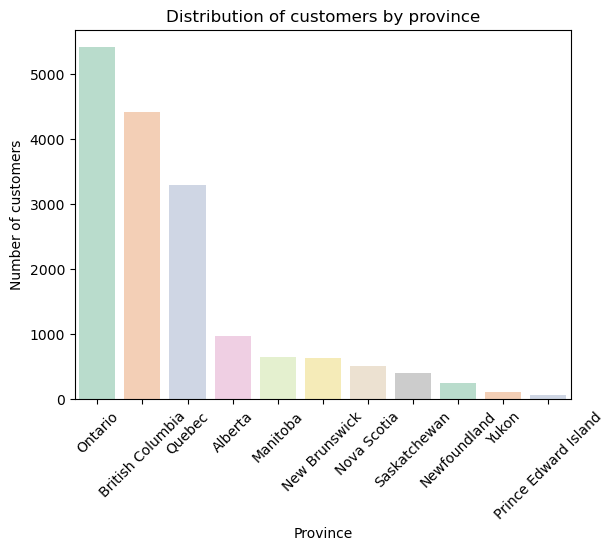

In [34]:
sns.barplot(x="Province", y= "Loyalty Number", data=province_unique, legend=False, palette='Pastel2')

plt.title('Distribution of customers by province')
plt.xlabel('Province')
plt.ylabel('Number of customers')
plt.xticks(rotation=45)
plt.show()

✍🏼 There is no even representation of the provinces, but it is observed that the vast majority of customers are from Ontario,
followed by British Columbia. In contrast, Yukon and Prince Edward Island have the lowest representation.

**4. Compara el salario promedio por nivel educativo**

C:\Users\crist\AppData\Local\Temp\ipykernel_50732\3262086398.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  education_salary = df_airline.groupby("Education")["Salary"].mean().reset_index()
C:\Users\crist\AppData\Local\Temp\ipykernel_50732\3262086398.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Education", x="Salary", data=education_salary, palette="plasma")


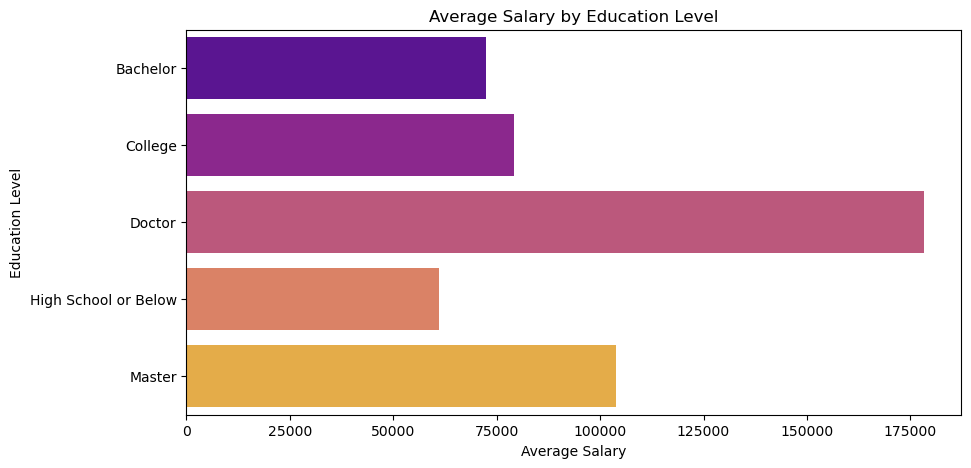

In [35]:
df_airline["Education"].unique()

# Grouping by educational level and average salary
education_salary = df_airline.groupby("Education")["Salary"].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(y="Education", x="Salary", data=education_salary, palette="plasma")
plt.xlabel("Average Salary")
plt.ylabel("Education Level")
plt.title("Average Salary by Education Level")

plt.show()

✍🏼 This information should be interpreted taking into account that 25.32% of the data within Salary were nulls and were filled with advanced imputation techniques.
With this in mind, we can see a positive correlation between the educational level and the average salary,
since, as the educational level increases, salaries tend to increase 📈

It should also be noted that there is a large jump in average salaries from Master level to Doctor level.

**5. What is the percentage of customers for each type of loyalty card?**

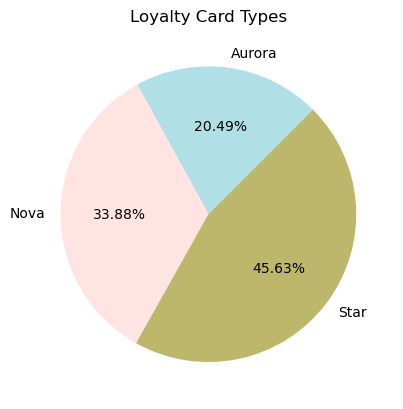

In [36]:
card_distribution = df_airline.groupby('Loyalty Card')['Loyalty Number'].nunique()

plt.pie(x=card_distribution.values, 
        labels=card_distribution.index,  
        autopct='%1.2f%%', # each segment with two decimals
        startangle=45,
        colors=['#B0E0E6', '#FFE4E1', '#BDB76B']) 
plt.title("Loyalty Card Types", fontsize=12)
plt.show()

✍🏼 Most customers move between the **Star** ⭐ and **Nova**🪐 loyalty cards (45.63% and 33.88% respectively), with **Aurora**🌌 being the least represented (20.6%).

**6. How are clients distributed according to their marital status and gender? Show a graph where I can see my clients
separated by marital status category and in each category I can see which ones are men and which ones are women**

C:\Users\crist\AppData\Local\Temp\ipykernel_50732\3599075430.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  marital_gender_distribution = df_airline.groupby(['Marital Status', 'Gender'])['Loyalty Number'].nunique().reset_index()


Text(0.5, 0, 'Marital status')

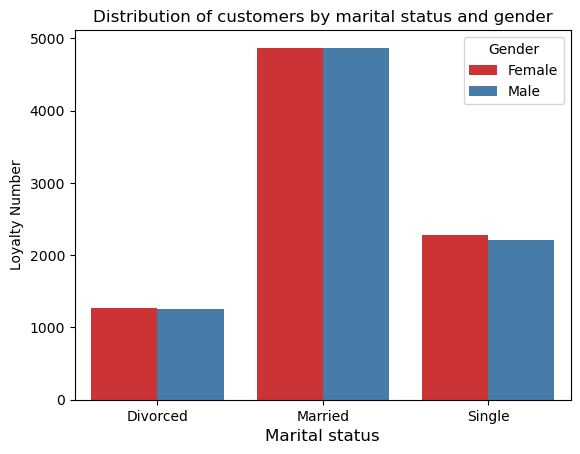

In [37]:
marital_gender_distribution = df_airline.groupby(['Marital Status', 'Gender'])['Loyalty Number'].nunique().reset_index()

sns.barplot(x='Marital Status', y="Loyalty Number", hue='Gender', data=marital_gender_distribution, palette='Set1')
plt.title('Distribution of customers by marital status and gender', fontsize=12)
plt.xlabel('Marital status', fontsize=12)

✍🏼 There is no clear difference between the two genders when it comes to marital status. What is observed is that the majority of clients, both men and women, are married.

### 🔥 **BONUS** Phase 3: Evaluating differences in flight bookings based on educational level 🔥

**The goal is to evaluate whether there are significant differences in the number of flights booked according to the educational level of the customers. To do this, the steps you should follow are:**

   1.  **Data Preparation:** Filter the dataset to include only the relevant columns: 'Flights Booked' and 'Education'.
   2.  **Descriptive Analysis:** Group the data by educational level and calculate basic descriptive statistics (such as the average, standard deviation) of the number of flights booked for each group.
   3.  **Statistical Test:** Perform a hypothesis test to determine if there is a significant difference in the number of flights booked between different educational levels. Since there are multiple groups, you can compare them in pairs.

**Data Preparation**

In [38]:
#First we filter the dataset to include only the relevant columns 'Flights Booked' and 'Education':

filtered_dataset = df_airline[['Education', 'Flights Booked']]
filtered_dataset.sample(10)

,Education,Flights Booked
237731,Bachelor,0
32743,Bachelor,0
337747,Bachelor,0
310033,Bachelor,0
227203,Master,0
233331,Bachelor,10
88311,Bachelor,10
186018,High School or Below,0
21175,Bachelor,0
89585,College,7


**Descriptive Analysis**

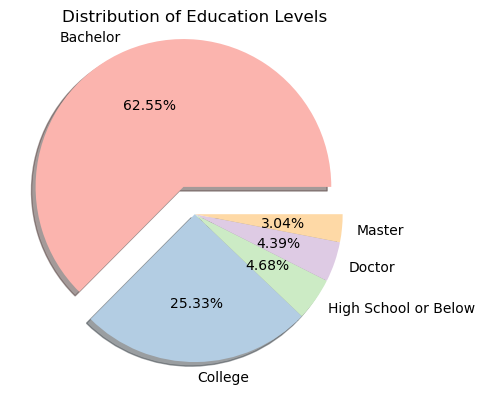

In [39]:
#First I want to see what the distribution is between educational levels, to take into account the sample size.

education_stats = filtered_dataset['Education'].value_counts()

y = education_stats
mylabels = ['Education']
myexplode = [0.2, 0, 0, 0, 0]
colors = plt.cm.cubehelix(range(len(education_stats)))

plt.pie(education_stats, labels=education_stats.index,autopct='%1.2f%%', explode = myexplode, shadow = True, colors=plt.cm.Pastel1.colors) 
plt.title("Distribution of Education Levels", fontsize=12)
plt.show()

In [40]:
# Data grouped according to educational level and calculated basic descriptive statistics.

In [41]:
stats_by_education = filtered_dataset.groupby ('Education')['Flights Booked'].agg(['mean', 'median', 'std'])
stats_by_education

C:\Users\crist\AppData\Local\Temp\ipykernel_50732\4211958192.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_by_education = filtered_dataset.groupby ('Education')['Flights Booked'].agg(['mean', 'median', 'std'])


,mean,median,std
Education,,,
Bachelor,4.110288,1.0,5.221671
College,4.169744,1.0,5.246040
Doctor,4.175512,1.0,5.256971
High School or Below,4.176209,1.0,5.239267
Master,4.200700,1.0,5.213956


In [42]:
filtered_dataset.groupby ('Education')['Flights Booked'].describe().T 

C:\Users\crist\AppData\Local\Temp\ipykernel_50732\2922316451.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_dataset.groupby ('Education')['Flights Booked'].describe().T


Education,Bachelor,College,Doctor,High School or Below,Master
count,252567.000000,102260.000000,17731.000000,18915.000000,12287.000000
mean,4.110288,4.169744,4.175512,4.176209,4.200700
std,5.221671,5.246040,5.256971,5.239267,5.213956
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000
75%,8.000000,8.000000,8.000000,8.000000,8.000000
max,21.000000,21.000000,21.000000,21.000000,21.000000


    Insights from the Descriptive Analysis:

✈️ The different educational levels have a similar number of flights booked, with an average (mean) close to 4 and a median of 1, which means that some people book very few flights, while others book many.

🎓 The standard deviation is almost identical across all groups (5.2), indicating that the variability in bookings is similar regardless of educational level.

📉 The percentiles show that most customers book between 1 and 8 flights, and the fact that the maximum number of bookings is exactly 21 across all educational levels could suggest a possible limit or bias in the data collection. It would be good to review the data collection method just in case.

🔍 For future analysis, it would be interesting to segment frequent travelers and analyze how they impact the overall results of the company.

**Statistical Test**

In [43]:
import scipy.stats as st
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

In [ ]:
# Define the groups
Group1 = filtered_dataset[filtered_dataset["Education"] == "High School or Below"]["Flights Booked"].values
Group2 = filtered_dataset[filtered_dataset["Education"] == "College"]["Flights Booked"].values
Group3 = filtered_dataset[filtered_dataset["Education"] == "Bachelor"]["Flights Booked"].values
Group4 = filtered_dataset[filtered_dataset["Education"] == "Master"]["Flights Booked"].values
Group5 = filtered_dataset[filtered_dataset["Education"] == "Doctor"]["Flights Booked"].values

In [45]:
def hipotesis_test(*args):
    """ 
    Perform a hypothesis test to compare groups.
    1. First, check if the data is normal using the Shapiro-Wilk or Kolmogorov-Smirnov test.
    2. If the data is normal, use Bartlett’s test to check for equal variances. If the data is not normal, use Levene's test.
    3. If the variances are equal, use the Student's t-test; if not, use the Welch version.
    4. If the data is not normal, use the Mann-Whitney test.
    
    Parameters: 
    *args: lists or arrays with the data from each group. Expects TWO groups to compare.

    Returns:
    A dictionary with the results of the normality, variance, and hypothesis tests. 
    """

    # Check if there are at least two groups
    if len(args) < 2:
        raise ValueError("At least two data sets are needed to perform the test.")
    
    # Check normality in each group
    normality = []
    for grupo in args:
        if len(grupo) > 50:
            p_valor_norm = stats.kstest(grupo, 'norm').pvalue  # Kolmogorov-Smirnov if n > 50
        else:
            p_valor_norm = stats.shapiro(grupo).pvalue  # Shapiro-Wilk if n <= 50
        normality.append(p_valor_norm > 0.05)

    normal_data = all(normality)  # True if all groups are normal

    # Test for equality of variances
    if normal_data:
        p_valor_var = stats.bartlett(*args).pvalue  # Bartlett test if the data are normal
    else:
        p_valor_var = stats.levene(*args, center="median").pvalue  # Levene's test if they are not normal

    equal_variances = p_valor_var > 0.05

    # Apply the appropriate test
    if normal_data:
        if equal_variances:
            t_stat, p_valor = stats.ttest_ind(*args, equal_var=True)
            used_test = "T-Student's test (equal variances)"
        else:
            t_stat, p_valor = stats.ttest_ind(*args, equal_var=False)
            used_test = "T-Welch's test (unequal variances)"
    else:
        t_stat, p_valor = stats.mannwhitneyu(*args)
        used_test = "Mann-Whitney U"

    # Level of significance
    alfa = 0.05

    # Results
    resultado = {
        "Normality test": normality,
        "Normal Data": normal_data,
        "p-valor Variance": p_valor_var,
        "Equal Variances": equal_variances,
        "Used Test": used_test,
        "Estadistic": t_stat,
        "p-valor": p_valor,
        "Conclusion": "We reject H0. That is, there are significant differences." if p_valor < alfa else "H0 is not rejected. That is, there are no significant differences)"
    }

    # Print the results more clearly
    print("\n📊 **Hypothesis test results** 📊")
    print(f"✅  Normality test: {'Sí' if normal_data else 'No'}")
    print(f"   - Normality by group: {normality}")
    print(f"✅ Variance Test: {'Equal' if equal_variances else 'Unequal'} (p = {p_valor_var:.4f})")
    print(f"✅ Applied test: {used_test}")
    print(f"📉 Estadistics: {t_stat:.4f}, p-valor: {p_valor:.4f}")
    print(f"🔍 Conclusion: {resultado['Conclusion']}\n")

In [46]:
# Comparing each pair of groups

In [47]:
hipotesis_test(Grupo1, Grupo2)


📊 **Hypothesis test results** 📊
✅  Normality test: No
   - Normality by group: [False, False]
✅ Variance Test: Equal (p = 0.9502)
✅ Applied test: Mann-Whitney U
📉 Estadistics: 969453228.5000, p-valor: 0.5757
🔍 Conclusion: H0 is not rejected. That is, there are no significant differences)



In [48]:
hipotesis_test(Grupo2, Grupo3)


📊 **Hypothesis test results** 📊
✅  Normality test: No
   - Normality by group: [False, False]
✅ Variance Test: Unequal (p = 0.0027)
✅ Applied test: Mann-Whitney U
📉 Estadistics: 12993040557.5000, p-valor: 0.0023
🔍 Conclusion: We reject H0. That is, there are significant differences.



In [49]:
hipotesis_test(Grupo3, Grupo4)


📊 **Hypothesis test results** 📊
✅  Normality test: No
   - Normality by group: [False, False]
✅ Variance Test: Equal (p = 0.1183)
✅ Applied test: Mann-Whitney U
📉 Estadistics: 1532540228.0000, p-valor: 0.0141
🔍 Conclusion: We reject H0. That is, there are significant differences.



In [50]:
hipotesis_test(Grupo4, Grupo5)


📊 **Hypothesis test results** 📊
✅  Normality test: No
   - Normality by group: [False, False]
✅ Variance Test: Equal (p = 0.8104)
✅ Applied test: Mann-Whitney U
📉 Estadistics: 109499288.0000, p-valor: 0.4139
🔍 Conclusion: H0 is not rejected. That is, there are no significant differences)



👩🏼‍🏫 **Final Conclusions**

We have established data groups based on educational levels from lowest to highest.

1️⃣ High School or Below - **Group 1**

2️⃣ College - **Group 2**

3️⃣ Bachelor - **Group 3**

4️⃣ Master - **Group 4**

5️⃣ Doctor - **Group 5**

We performed pairwise comparisons between the five groups for each educational level to observe the relationship between the number of flights booked and the educational level. Overall, no statistically significant differences are observed in any pair of groups, except for Group 3 (Bachelor), where significant differences were observed when compared to Group 2 (College) and Group 4 (Master). This suggests that individuals with a Bachelor's degree exhibit a different flight booking behavior compared to those with a lower (College) or higher education level (Master). However, no major distinctions were found among the other educational levels.

As a general conclusion, educational level does not seem to be a defining factor for flight booking behavior, except for the transition observed at the Bachelor's level. 

Perhaps in future analyses, we could put the focus on other demographic or socioeconomic variables, such as gender, marital status, among others, that could identify more influential factors that will help to provide insights when targeting a specific market segment for marketing strategies, promotions, or targeted offers.

